## Process and plot output from DRMSD calculations

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.mlab import griddata
import matplotlib.gridspec as gridspec

In [2]:
import matplotlib.font_manager
from IPython.core.display import HTML

def make_html(fontname):
    return "<p>{font}: <span style='font-family:{font}; font-size: 24px;'>{font}</p>".format(font=fontname)

code = "\n".join([make_html(font) for font in sorted(set([f.name for f in matplotlib.font_manager.fontManager.ttflist]))])

HTML("<div style='column-count: 2;'>{}</div>".format(code))

In [10]:
D = pd.read_csv('DRMSD_mean_pairs_all_versus_centroid.csv',index_col=0)
print(D)
print(D.max())

            0          1          2          3          4          5  \
0    0.000000   8.227803  13.943726  14.278902  11.812107  14.531508   
1    8.227803   0.000000  13.131826   6.650481   9.081695  11.381817   
2   13.943726  13.131826   0.000000  16.039211  13.725344  11.234134   
3   14.278902   6.650481  16.039211   0.000000  14.174785  14.807267   
4   11.812107   9.081695  13.725344  14.174785   0.000000   8.521653   
5   14.531508  11.381817  11.234134  14.807267   8.521653   0.000000   
6   17.569613  10.597297  18.927203   6.595411  14.766728  18.160206   
7   25.244899  13.755883  18.696318  11.757493  12.934567  13.957519   
8   12.043452   8.676459   7.633376   9.432174  10.658061   9.197017   
9   20.319588  10.448405  13.016266   9.264143  12.464647  11.456365   
10   7.408804   8.348448  12.607273   5.724662  10.047484  12.200345   
11  17.292199  10.000956  17.336306  12.307629  13.798263  15.162784   
12  28.293134  16.522613  12.693334  14.805750  15.732153  15.01

In [4]:
print(D.columns.values)

['0' '1' '2' '3' '4' '5' '6' '7' '8' '9' '10' '11' '12' '13' '14' '15']


In [5]:
IDs = {}
for line in open('RBs_indexes_DRMSD_calculation_all_versus_centroid.dat'):
    vals = line.split('\t')
    IDs[vals[0]] = vals[1].strip()
    print(line)
    
print(IDs)
print(len(IDs))

0	('CSN1', '246-426')

1	('CSN2', '308-397')

2	('CSN4', '3-131')

3	('CSN4', '365-406'), ('CSN5', '296-333'), ('CSN6', '271-316'), ('CSN7', '163-212'), ('CSN1', '431-462'), ('CSN2', '417-443'), ('CSN3', '368-401'), ('CSN8', '194-209')

4	('CSN2', '192-289')

5	('CSN2', '30-179')

6	('CSN6', '215-267')

7	('CSN7', '8-158')

8	('CSN4', '139-361')

9	('CSN3', '177-361')

10	('CSN5', '25-283')

11	('CSN3', '3-163')

12	('CSN8', '11-164')

13	('CSN6', '29-207')

14	('CSN1', '128-227')

15	('CSN1', '44-107')

{'0': "('CSN1', '246-426')", '1': "('CSN2', '308-397')", '2': "('CSN4', '3-131')", '3': "('CSN4', '365-406'), ('CSN5', '296-333'), ('CSN6', '271-316'), ('CSN7', '163-212'), ('CSN1', '431-462'), ('CSN2', '417-443'), ('CSN3', '368-401'), ('CSN8', '194-209')", '4': "('CSN2', '192-289')", '5': "('CSN2', '30-179')", '6': "('CSN6', '215-267')", '7': "('CSN7', '8-158')", '8': "('CSN4', '139-361')", '9': "('CSN3', '177-361')", '10': "('CSN5', '25-283')", '11': "('CSN3', '3-163')", '12': "('CSN

In [6]:
l = {}
for k, v in IDs.items():
    vv = v.replace("'","").replace(" ","").replace("-",",").replace("(","").replace(")","").split(",")   
    vvv = [w for w in vv]
    vvv = list(filter(None, vvv))
    c = vvv

    if len(c)==3:
        if int(c[1]) < 10:
            l[k] = "%4s\u2007\u2007\u2007%s-%s" %(c[0], c[1], c[2])
        elif int(c[1]) < 100:
            l[k] = "%4s\u2007\u2007%s-%s" %(c[0], c[1], c[2])
        else:
            l[k] = "%4s\u2007%s-%s" %(c[0], c[1], c[2])
    else:
        l[k] = 'α-Helical core'


labels = [l[str(k)] for k in range(len(list(IDs.items())))]

for ls in labels:
    print(ls)

print(len(labels), len(D.columns.values))

CSN1 246-426
CSN2 308-397
CSN4   3-131
α-Helical core
CSN2 192-289
CSN2  30-179
CSN6 215-267
CSN7   8-158
CSN4 139-361
CSN3 177-361
CSN5  25-283
CSN3   3-163
CSN8  11-164
CSN6  29-207
CSN1 128-227
CSN1  44-107
16 16


In [7]:
import scipy
import scipy.cluster.hierarchy as sch
from scipy.spatial.distance import squareform
#import seaborn as sns
from matplotlib.pyplot import cm

cmap = cm.get_cmap('tab20b', 10) 
colors = [matplotlib.colors.rgb2hex(cmap(i)[:3]) for i in range(cmap.N)]


sch.set_link_color_palette(colors)

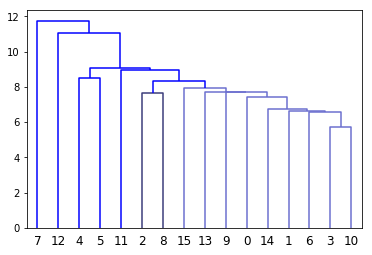

In [8]:
condensedD = squareform(D)
Y = sch.linkage(condensedD, method='single', optimal_ordering=False)
Z1 = sch.dendrogram(Y, orientation='top')

In [9]:
def make_colormap(colors):
    from matplotlib.colors import LinearSegmentedColormap, ColorConverter
    from numpy import sort

    z  = np.array(sorted(colors.keys()))
    n  = len(z)
    z1 = min(z)
    zn = max(z)
    x0 = (z - z1) / (zn - z1)

    CC = ColorConverter()
    R = []
    G = []
    B = []
    for i in range(n):
        Ci = colors[z[i]]      
        if type(Ci) == str:
            RGB = CC.to_rgb(Ci)
        else:
            RGB = Ci
        R.append(RGB[0])
        G.append(RGB[1])
        B.append(RGB[2])

    cmap_dict = {}
    cmap_dict['red']   = [(x0[i],R[i],R[i]) for i in range(len(R))]
    cmap_dict['green'] = [(x0[i],G[i],G[i]) for i in range(len(G))]
    cmap_dict['blue']  = [(x0[i],B[i],B[i]) for i in range(len(B))]
    mymap = LinearSegmentedColormap('mymap',cmap_dict)
    return mymap

[7, 12, 4, 5, 11, 2, 8, 15, 13, 9, 0, 14, 1, 6, 3, 10] 16
CSN1 246-426
CSN2 308-397
CSN4   3-131
α-Helical core
CSN2 192-289
CSN2  30-179
CSN6 215-267
CSN7   8-158
CSN4 139-361
CSN3 177-361
CSN5  25-283
CSN3   3-163
CSN8  11-164
CSN6  29-207
CSN1 128-227
CSN1  44-107
CSN7   8-158
CSN8  11-164
CSN2 192-289
CSN2  30-179
CSN3   3-163
CSN4   3-131
CSN4 139-361
CSN1  44-107
CSN6  29-207
CSN3 177-361
CSN1 246-426
CSN1 128-227
CSN2 308-397
CSN6 215-267
α-Helical core
CSN5  25-283


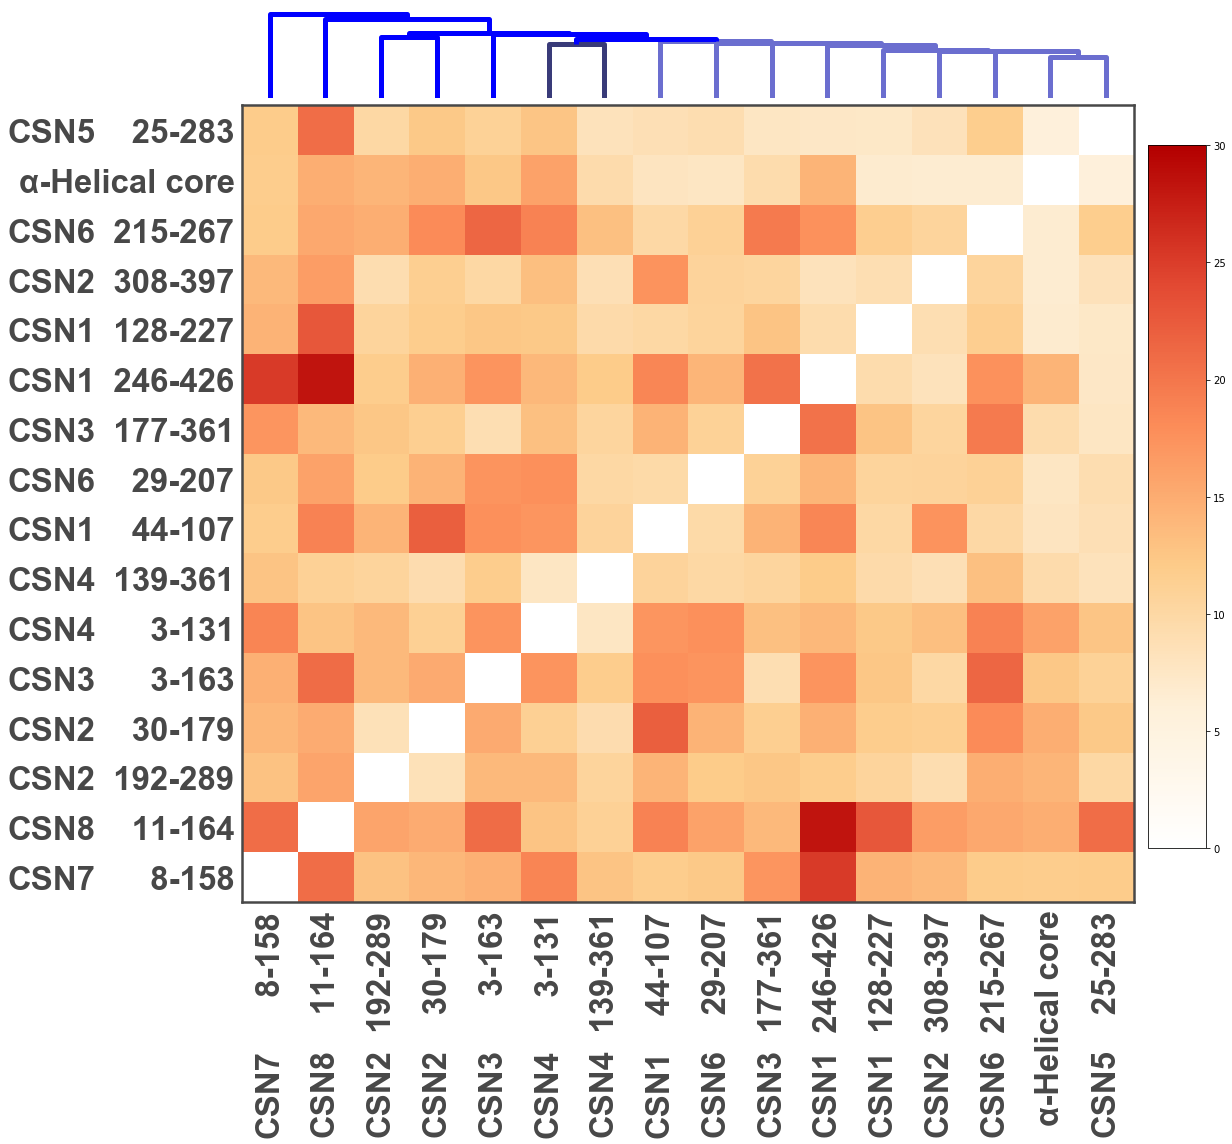

In [17]:
fig, ax = plt.subplots(figsize=(16.0,16.0))
gs = gridspec.GridSpec(2, 1, 
                       width_ratios = [1.0],
                       height_ratios = [0.1,0.9])

ax = plt.subplot(gs[0])
matplotlib.rcParams['lines.linewidth'] = 5.0
#ax.set_title('dRMSD between components', fontsize=16, fontname='Arial', color="#484848", fontweight='bold')
Y = sch.linkage(condensedD, method='single',optimal_ordering=False)
Z1 = sch.dendrogram(Y)

ax.set_xticks([])
ax.set_yticks([])

ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)

ax = plt.subplot(gs[1])
# Reorder matrix
idx1 = Z1['leaves']
DDR = np.array(D)
DDR_new = DDR[idx1,:]
DDR_new = DDR_new[:,idx1]

print(idx1, len(idx1))

GnuPlotReds = make_colormap({0.0:"#FFFFFF", 0.2:"#FEF0D9", 0.4:"#FDCC8A", 0.6:"#FC8D59", 0.8:"#E34A33", 1.0:"#B30000"})
im = ax.matshow(DDR_new, cmap=GnuPlotReds, origin='lower', aspect="auto", vmin=0, vmax=30.0)

ax.xaxis.set_ticks_position('bottom')
ax.set_yticks(range(len(DDR)))
ax.set_xticks(range(len(DDR)))
ax.tick_params(axis="x", bottom=False)
ax.tick_params(axis="y", left=False)

for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(2.5)
    ax.spines[axis].set_color("#484848")


for lb in labels:
    print(lb)

labels_new = [labels[i] for i in idx1]
for lb in labels_new:
    print(lb)

from matplotlib.ticker import FormatStrFormatter
#plt.gca().xaxis.set_major_formatter(FormatStrFormatter('%s'))
#ax.xaxis.set_major_formatter(FormatStrFormatter('%11s'))
plt.xticks(range(len(labels_new)), labels_new, fontname='Arial', fontsize=33, color="#484848", fontweight='bold', rotation=90)
plt.yticks(range(len(labels_new)), labels_new, fontname='Arial', fontsize=33, color="#484848", fontweight='bold', rotation=0)

#plt.gca().tick_params(axis="x",rotation=90,size=16, fontname='Arial')
#plt.gca().tick_params(axis="y",rotation=0.)


#ax.set_xticklabels([str(label) for label in labels_new], rotation=90,fontsize=16, fontname='Arial')
#ax.set_yticklabels(labels_new, rotation=0 ,fontsize=16, fontname='Arial')

cax = fig.add_axes([1.0, 0.26, 0.05, 0.61])
fig.colorbar(im, cax=cax)

#ax = fig.add_subplot(gs[1,1])
#plt.colorbar(cax, ax=ax)

plt.tight_layout(h_pad = 0.0)
fig.savefig('dRMSD_Cluster.png', dpi=400, transparent=True)

In [77]:
labels_new

['CSN7\u20078-158',
 'CSN8\u200711-164',
 'CSN2\u2007192-289',
 'CSN2\u200730-179',
 'CSN3\u20073-163',
 'CSN4\u20073-131',
 'CSN4\u2007139-361',
 'CSN1\u200744-107',
 'CSN6\u200729-207',
 'CSN3\u2007177-361',
 'CSN1\u2007246-426',
 'CSN1\u2007128-227',
 'CSN2\u2007308-397',
 'CSN6\u2007215-267',
 'α-Helical core',
 'CSN5\u200725-283']